## Trabalho 1 – Técnicas de Anonimização – Generalização


In [2]:
from itertools import islice
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df1 = pd.read_csv('regioes.csv').drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('covid.csv', sep=';').drop(['Unnamed: 0'], axis=1)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Código IBGE do Município       184 non-null    int64 
 1   Nome da Mesoregião             184 non-null    object
 2   Sigla da Unidade da Federação  184 non-null    object
 3   Nome das Grandes Regiões       184 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.9+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879543 entries, 0 to 879542
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Identificador    879543 non-null  object 
 1   CodigoMunicipio  879543 non-null  float64
 2   Municipio        879543 non-null  object 
 3   Estado           879543 non-null  object 
 4   Genero           879543 non-null  object 
 5   Nascimento       879543 non-null  object 
 6   ResultadoExame   879543 non-null  object 
dtypes: float64(1), object(6)
memory usage: 47.0+ MB


In [6]:
df1 = df1.rename(columns={"Código IBGE do Município": "CodigoMunicipio"})

In [7]:
df2.CodigoMunicipio = df2.CodigoMunicipio.astype(int)

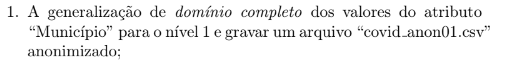

In [21]:
def group_elements(lst, chunk_size):
    lst = iter(lst)
    return iter(lambda: tuple(islice(lst, chunk_size)), ())

In [11]:
def generalizando_nivel_1_municipio(df1, df2):
    
    #Juntando os datasframes 
    df3 = pd.merge(df1, df2, on="CodigoMunicipio", how="outer")

    nv_1_muni = []
    
    for meso in df3['Nome da Mesoregião'].unique():
        muni_list = df3[df3['Nome da Mesoregião'] == meso].Municipio.unique()
        for new_list in group_elements(muni_list , len(muni_list)//2):
            if len(list(new_list)) == 1:
                lista_1.extend(list(new_list))
            else:
                lista_1 = list(new_list)
            nv_1_muni.append(lista_1)

    municipio_nv_1 = []
    for muni in df3.Municipio:
        for reg in nv_1_muni:
            if muni in reg:
                municipio_nv_1.append(reg)
                break
    
    df4 = df2.copy()
    df4['Municipio'] = municipio_nv_1

    return df4

In [12]:
df3 = generalizando_nivel_1_municipio(df1, df2)
df3.head()

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,2003-08-14,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,1983-11-07,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,FEMININO,1982-01-14,Negativo
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,1992-03-12,Negativo
4,e257ccdc48289f02e047cbf046251319,230370,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,1970-03-06,Negativo


In [13]:
df3.to_csv('covid_anon01.csv', index=None)

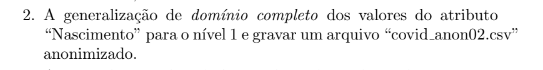


In [14]:
def generalizando_nivel_1_nascimento(df2):
    df3 = df2.copy()
    df3['Nascimento'] = df2['Nascimento'].str.slice_replace(7, 10, '')
    return df3

df3 = generalizando_nivel_1_nascimento(df2)
df3.head()

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290,SOBRAL,CE,MASCULINO,2003-08,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960,PACAJUS,CE,MASCULINO,1983-11,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523,HORIZONTE,CE,FEMININO,1982-01,Negativo
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440,FORTALEZA,CE,MASCULINO,1992-03,Negativo
4,e257ccdc48289f02e047cbf046251319,230370,CAUCAIA,CE,MASCULINO,1970-03,Negativo


In [15]:
df3.to_csv('covid_anon02.csv', index=None)

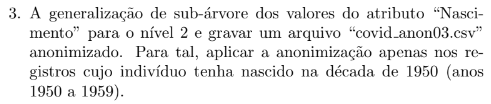

In [16]:
def generalizando_nivel_2_municipio(df1, df2):
    df3 = pd.merge(df1, df2, on="CodigoMunicipio", how="outer")

    nv_1_muni = []
    for meso in df3['Nome da Mesoregião'].unique():
        muni_list = df3[df3['Nome da Mesoregião'] == meso].Municipio.unique()
        nv_1_muni.append(muni_list)

    municipio_nv_1 = []
    for muni in df3.Municipio:
        for reg in nv_1_muni:
            if muni in reg:
                municipio_nv_1.append(reg)
                break
    
    df4 = df2.copy()
    df4['Municipio'] = municipio_nv_1
    
    return df4

In [17]:
def generalizando_nivel_2_nascimento(df2):
    df3 = df2[df2['Nascimento'].str.contains("195")==True]
    df3['Nascimento'] = df3['Nascimento'].str.slice_replace(4, 10, '')

    return df3.reindex(df2.index).combine_first(df2)

df3 = generalizando_nivel_2_nascimento(df2)
df3.head()

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440.0,FORTALEZA,CE,MASCULINO,1992-03-12,Negativo
4,e257ccdc48289f02e047cbf046251319,230370.0,CAUCAIA,CE,MASCULINO,1970-03-06,Negativo


In [18]:
df3.to_csv('covid_anon03.csv', index=None)

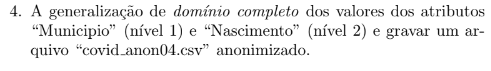

In [19]:
def generalizando_nivel_2_nascimento(df2):
    df3 = df2.copy()
    df3['Nascimento'] = df2['Nascimento'].str.slice_replace(4, 10, '')
    return df3

df3 = generalizando_nivel_1_municipio(df1, df2)
df3 = generalizando_nivel_2_nascimento(df3)
df3.head()

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,2003,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,1983,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,FEMININO,1982,Negativo
3,9683fc5fd2c0f7b72fa92ffd259d738a,230440,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,1992,Negativo
4,e257ccdc48289f02e047cbf046251319,230370,"[ABAIARA, ALTANEIRA, ARARIPE, ASSARE, AURORA, ...",CE,MASCULINO,1970,Negativo


In [20]:
df3.to_csv('covid_anon04.csv', index=None)

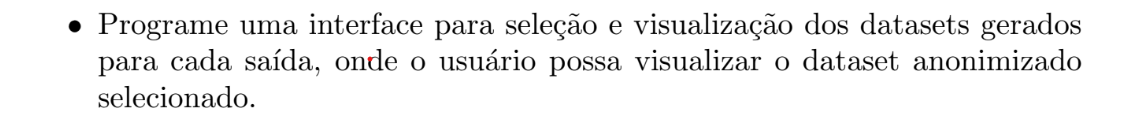

## Execute o arquivo T1_FrontEnd.py no streamlit 

Instalação da ferramenta Streamlit no Anaconda:

https://docs.streamlit.io/library/get-started/installation


### Abra o Prompt do Anaconda 

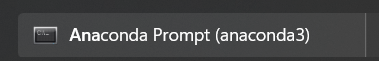

### Entre na pasta onde está localizado o arquivo ###
* Exemplo: cd C:\Users\Kelvin\Desktop\Proteção de dados\T1


### Rode o seguinte comando: ###
streamlit run T1_FrontEnd.py --server.maxMessageSize=400




# Caso não consiga executar a atividade acima, assista o vídeo "Demonstração.mp4" anexado na entrega